In [1]:
# prompt: saya ingin memanggil data prabowo.csv yang telah saya unggah

import pandas as pd

# Ganti 'Prabowo.csv' dengan nama file yang sesuai jika berbeda
prabowo = pd.read_csv('prabowo.csv')

# Menampilkan beberapa baris pertama data untuk verifikasi
print(prabowo.head())


   conversation_id_str                      created_at  favorite_count  \
0         1.897920e+18  Fri Mar 07 07:59:37 +0000 2025            1748   
1         1.897700e+18  Thu Mar 06 17:34:14 +0000 2025            3587   
2         1.897800e+18  Fri Mar 07 00:02:53 +0000 2025             728   
3         1.897640e+18  Thu Mar 06 13:32:35 +0000 2025           33308   
4         1.897640e+18  Thu Mar 06 13:23:19 +0000 2025            3070   

                                           full_text        id_str  \
0  mewakili semua CPNS dan PPPK 2024 @kempanrb @B...  1.897920e+18   
1  Foto ini jauh lebih bernilai dari pada kerugia...  1.897700e+18   
2  bayangin temen gw sampe se-desperate ini sm ne...  1.897800e+18   
3  Pemerintah anjing. Neraka buat lo semua anjing...  1.897640e+18   
4  Prabowo menantu Soeharto Gibran anak Jokowi. I...  1.897640e+18   

                                           image_url  in_reply_to_screen_name  \
0    https://pbs.twimg.com/media/GlbEO6EbQAEleZd.jpg 

In [2]:
prabowo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      95 non-null     float64
 1   created_at               95 non-null     object 
 2   favorite_count           95 non-null     int64  
 3   full_text                95 non-null     object 
 4   id_str                   95 non-null     float64
 5   image_url                90 non-null     object 
 6   in_reply_to_screen_name  0 non-null      float64
 7   lang                     95 non-null     object 
 8   location                 54 non-null     object 
 9   quote_count              95 non-null     int64  
 10  reply_count              95 non-null     int64  
 11  retweet_count            95 non-null     int64  
 12  tweet_url                95 non-null     object 
 13  user_id_str              95 non-null     float64
 14  username                 95 

**Tahapan Cleaning Data**

In [3]:
prabowo["full_text"]

,full_text
0,mewakili semua CPNS dan PPPK 2024 @kempanrb @B...
1,Foto ini jauh lebih bernilai dari pada kerugia...
2,bayangin temen gw sampe se-desperate ini sm ne...
3,Pemerintah anjing. Neraka buat lo semua anjing...
4,Prabowo menantu Soeharto Gibran anak Jokowi. I...
...,...
90,Kalaupun ada Presiden dlm konteks konstitusi ...
91,TONTON SEKARANG! #ILC &gt;&gt; IWAN PILIANG //...
92,9 naga itu kemungkinan dibawah Jokowi tapi say...
93,Hari ini saya berkesempatan mengunjungi SD Neg...


In [4]:
#membuat function cleaning

import re
def clean(s):
    s = s.replace(r'<lb>', "\n")
    s = s.replace(r'<tab>', "\i")
    s = re.sub(r'<br */*>', "\n", s)
    s = s.replace("&lt;", "<").replace("&gt;", ">").replace("&amp;", "&")
    s = s.replace("&amp;", "&")
    # markdown urls
    s = re.sub(r'\(https*://[^\)]*\)', "", s)
    # normal urls
    s = re.sub(r'https*://[^\s]*', "", s)
    s = re.sub(r'_+', ' ', s)
    s = re.sub(r'"+', '"', s)
    return str(s)

In [5]:
#membuat sebuah variabel baru untuk menyimpan data hasil cleaning

prabowo["text_clean"] = ''

In [6]:
#Pembersihan text dari symbol
for i, row in prabowo.iterrows():
    prabowo.at[i, "text_clean"] = clean(row.full_text)

In [7]:
prabowo.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,text_clean
0,1.897920e+18,Fri Mar 07 07:59:37 +0000 2025,1748,mewakili semua CPNS dan PPPK 2024 @kempanrb @B...,1.897920e+18,https://pbs.twimg.com/media/GlbEO6EbQAEleZd.jpg,NaN,in,"Minahasa, Sulawesi Utara",30,68,765,https://x.com/dehuu_/status/1897920056622727392,1.652920e+18,dehuu_,mewakili semua CPNS dan PPPK 2024 @kempanrb @B...
1,1.897700e+18,Thu Mar 06 17:34:14 +0000 2025,3587,Foto ini jauh lebih bernilai dari pada kerugia...,1.897700e+18,https://pbs.twimg.com/ext_tw_video_thumb/18977...,NaN,in,NaN,16,114,841,https://x.com/ZulkifliLubis69/status/189770227...,1.269810e+18,ZulkifliLubis69,Foto ini jauh lebih bernilai dari pada kerugia...
2,1.897800e+18,Fri Mar 07 00:02:53 +0000 2025,728,bayangin temen gw sampe se-desperate ini sm ne...,1.897800e+18,https://pbs.twimg.com/media/GlZXHJra8AAjDLI.jpg,NaN,in,NaN,13,23,300,https://x.com/babakbelur902/status/18978000824...,1.804070e+18,babakbelur902,bayangin temen gw sampe se-desperate ini sm ne...
3,1.897640e+18,Thu Mar 06 13:32:35 +0000 2025,33308,Pemerintah anjing. Neraka buat lo semua anjing...,1.897640e+18,NaN,NaN,in,tebak di mana,440,317,4762,https://x.com/jadisayaisi/status/1897641463296...,1.382200e+18,jadisayaisi,Pemerintah anjing. Neraka buat lo semua anjing...
4,1.897640e+18,Thu Mar 06 13:23:19 +0000 2025,3070,Prabowo menantu Soeharto Gibran anak Jokowi. I...,1.897640e+18,https://pbs.twimg.com/media/GlXCNsJa0AAnIxz.jpg,NaN,in,Indonesia,39,82,1069,https://x.com/tempodotco/status/18976391292336...,1.812994e+07,tempodotco,Prabowo menantu Soeharto Gibran anak Jokowi. I...


In [8]:
prabowo[["full_text", "text_clean"]].head()

,full_text,text_clean
0,mewakili semua CPNS dan PPPK 2024 @kempanrb @B...,mewakili semua CPNS dan PPPK 2024 @kempanrb @B...
1,Foto ini jauh lebih bernilai dari pada kerugia...,Foto ini jauh lebih bernilai dari pada kerugia...
2,bayangin temen gw sampe se-desperate ini sm ne...,bayangin temen gw sampe se-desperate ini sm ne...
3,Pemerintah anjing. Neraka buat lo semua anjing...,Pemerintah anjing. Neraka buat lo semua anjing...
4,Prabowo menantu Soeharto Gibran anak Jokowi. I...,Prabowo menantu Soeharto Gibran anak Jokowi. I...


NLTK Process

In [9]:
pip install nltk

In [10]:
#tokenisasi
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize,word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [11]:
#Contoh tokenisasi
example_text = "Hello there, how are you doing today? The weather is great today. The sky is blue. python is awsome"
print(sent_tokenize(example_text))
print(word_tokenize(example_text))

['Hello there, how are you doing today?', 'The weather is great today.', 'The sky is blue.', 'python is awsome']
['Hello', 'there', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', 'today', '.', 'The', 'sky', 'is', 'blue', '.', 'python', 'is', 'awsome']


In [12]:
# prompt: saya ingin melakukan tokenisasi seperi syntax 23 untuk prabowo["text_clean"]

# Tokenisasi kata pada kolom 'text_clean'
prabowo['tokenized_text'] = prabowo['text_clean'].apply(lambda x: word_tokenize(x))

# Menampilkan beberapa baris pertama data dengan kolom tokenized_text
print(prabowo[['text_clean', 'tokenized_text']].head())


                                          text_clean  \
0  mewakili semua CPNS dan PPPK 2024 @kempanrb @B...   
1  Foto ini jauh lebih bernilai dari pada kerugia...   
2  bayangin temen gw sampe se-desperate ini sm ne...   
3  Pemerintah anjing. Neraka buat lo semua anjing...   
4  Prabowo menantu Soeharto Gibran anak Jokowi. I...   

                                      tokenized_text  
0  [mewakili, semua, CPNS, dan, PPPK, 2024, @, ke...  
1  [Foto, ini, jauh, lebih, bernilai, dari, pada,...  
2  [bayangin, temen, gw, sampe, se-desperate, ini...  
3  [Pemerintah, anjing, ., Neraka, buat, lo, semu...  
4  [Prabowo, menantu, Soeharto, Gibran, anak, Jok...  


In [13]:
prabowo["tokenized_text"].head()

,tokenized_text
0,"[mewakili, semua, CPNS, dan, PPPK, 2024, @, ke..."
1,"[Foto, ini, jauh, lebih, bernilai, dari, pada,..."
2,"[bayangin, temen, gw, sampe, se-desperate, ini..."
3,"[Pemerintah, anjing, ., Neraka, buat, lo, semu..."
4,"[Prabowo, menantu, Soeharto, Gibran, anak, Jok..."


In [15]:
# prompt: saya ingin mengambil stopwords dalam bahasa indonesia

import nltk
nltk.download('stopwords')

# Mendapatkan daftar stopwords dalam bahasa Indonesia
from nltk.corpus import stopwords
stop_words_indonesia = stopwords.words('indonesian')

stop_words_indonesia


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [16]:
from nltk.corpus import stopwords
text = 'he is a good boy. he is very good in coding'
text = word_tokenize(text)
text_with_no_stopwords = [word for word in text if word not in stopwords.words('english')]
text_with_no_stopwords

['good', 'boy', '.', 'good', 'coding']

In [17]:
# prompt: saya ingin melakukan stopwords di prabowo["tokenized_text"]

# Mendapatkan daftar stopwords dalam bahasa Indonesia
stop_words_indonesia = stopwords.words('indonesian')

# Fungsi untuk menghapus stopwords dari list token
def remove_stopwords(token_list):
  return [word for word in token_list if word.lower() not in stop_words_indonesia]

# Menerapkan fungsi remove_stopwords ke kolom 'tokenized_text'
prabowo['tokenized_stopwords'] = prabowo['tokenized_text'].apply(remove_stopwords)

# Menampilkan beberapa baris pertama data dengan kolom tokenized_text_no_stopwords
prabowo[['tokenized_text', 'tokenized_stopwords']].head()


,tokenized_text,tokenized_stopwords
0,"[mewakili, semua, CPNS, dan, PPPK, 2024, @, ke...","[mewakili, CPNS, PPPK, 2024, @, kempanrb, @, B..."
1,"[Foto, ini, jauh, lebih, bernilai, dari, pada,...","[Foto, bernilai, kerugian, negara, dakwakan, ...."
2,"[bayangin, temen, gw, sampe, se-desperate, ini...","[bayangin, temen, gw, sampe, se-desperate, sm,..."
3,"[Pemerintah, anjing, ., Neraka, buat, lo, semu...","[Pemerintah, anjing, ., Neraka, lo, anjing, .,..."
4,"[Prabowo, menantu, Soeharto, Gibran, anak, Jok...","[Prabowo, menantu, Soeharto, Gibran, anak, Jok..."


Stemming

In [18]:
#Contoh Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()    ## Creating an object for porterstemmer
example_words = ['earn',"earning","earned","earns"]  ##Example words
for w in example_words:
    print(ps.stem(w))

earn
earn
earn
earn


In [19]:
# prompt: saya ingin melakukan stemming pada prabowo["tokenized_stopwords"] dalam bahasa indonesia

!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 14.0 MB/s eta 0:00:00


In [20]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Buat objek stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming pada list token
def stemming_sastrawi(token_list):
  return [stemmer.stem(word) for word in token_list]

# Terapkan fungsi stemming_sastrawi ke kolom 'tokenized_stopwords'
prabowo['stemmed_words'] = prabowo['tokenized_stopwords'].apply(stemming_sastrawi)

# Menampilkan beberapa baris pertama data dengan kolom stemmed_words
prabowo[['tokenized_stopwords', 'stemmed_words']]

,tokenized_stopwords,stemmed_words
0,"[mewakili, CPNS, PPPK, 2024, @, kempanrb, @, B...","[wakil, cpns, pppk, 2024, , kempanrb, , bkngoi..."
1,"[Foto, bernilai, kerugian, negara, dakwakan, ....","[foto, nila, rugi, negara, dakwa, , , tomlembo..."
2,"[bayangin, temen, gw, sampe, se-desperate, sm,...","[bayangin, temen, gw, sampe, se-desperate, sm,..."
3,"[Pemerintah, anjing, ., Neraka, lo, anjing, .,...","[perintah, anjing, , neraka, lo, anjing, , cpn..."
4,"[Prabowo, menantu, Soeharto, Gibran, anak, Jok...","[prabowo, menantu, soeharto, gibran, anak, jok..."
...,...,...
90,"[Presiden, dlm, konteks, konstitusi, yg, berda...","[presiden, dlm, konteks, konstitusi, yg, daula..."
91,"[TONTON, !, #, ILC, >, >, IWAN, PILIANG, //, P...","[tonton, , , ilc, , , iwan, piliang, , prabowo..."
92,"[9, naga, dibawah, Jokowi, nyakin, dibawah, Pr...","[9, naga, bawah, jokowi, nyakin, bawah, prabow..."
93,"[berkesempatan, mengunjungi, SD, Negeri, 05, J...","[sempat, unjung, sd, negeri, 05, jati, tk, neg..."


In [22]:
# prompt: berikan saya syntax untuk membuat analisis sentimen untuk variabel stemmed_words

!pip install vaderSentiment

In [23]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Inisialisasi objek SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text_list):
    # Gabungkan list token menjadi satu string
    text = " ".join(text_list)

    # Lakukan analisis sentimen
    scores = analyzer.polarity_scores(text)

    # Kembalikan nilai compound score
    return scores['compound']

# Terapkan fungsi analyze_sentiment ke kolom 'stemmed_words'
prabowo['sentiment_score'] = prabowo['stemmed_words'].apply(analyze_sentiment)

In [24]:
# Menampilkan beberapa baris pertama data dengan kolom sentiment_score
print(prabowo[['stemmed_words', 'sentiment_score']].head())


                                       stemmed_words  sentiment_score
0  [wakil, cpns, pppk, 2024, , kempanrb, , bkngoi...            0.000
1  [foto, nila, rugi, negara, dakwa, , , tomlembo...            0.000
2  [bayangin, temen, gw, sampe, se-desperate, sm,...            0.296
3  [perintah, anjing, , neraka, lo, anjing, , cpn...           -0.340
4  [prabowo, menantu, soeharto, gibran, anak, jok...            0.000


In [27]:
# Membuat label setiap komentar

# Fungsi untuk menentukan label sentimen berdasarkan sentiment_score
def label_sentiment(score):
    if score < 0:
        return 'negatif'
    elif score == 0:
        return 'netral'
    else:
        return 'positif'

# Buat kolom baru 'sentiment_label' berdasarkan kolom 'sentiment_score'
prabowo['sentiment_label'] = prabowo['sentiment_score'].apply(label_sentiment)

# Menampilkan beberapa baris pertama data dengan kolom sentiment_label
print(prabowo[['stemmed_words', 'sentiment_score', 'sentiment_label']].head())


                                       stemmed_words  sentiment_score  \
0  [wakil, cpns, pppk, 2024, , kempanrb, , bkngoi...            0.000   
1  [foto, nila, rugi, negara, dakwa, , , tomlembo...            0.000   
2  [bayangin, temen, gw, sampe, se-desperate, sm,...            0.296   
3  [perintah, anjing, , neraka, lo, anjing, , cpn...           -0.340   
4  [prabowo, menantu, soeharto, gibran, anak, jok...            0.000   

  sentiment_label  
0          netral  
1          netral  
2         positif  
3         negatif  
4          netral  


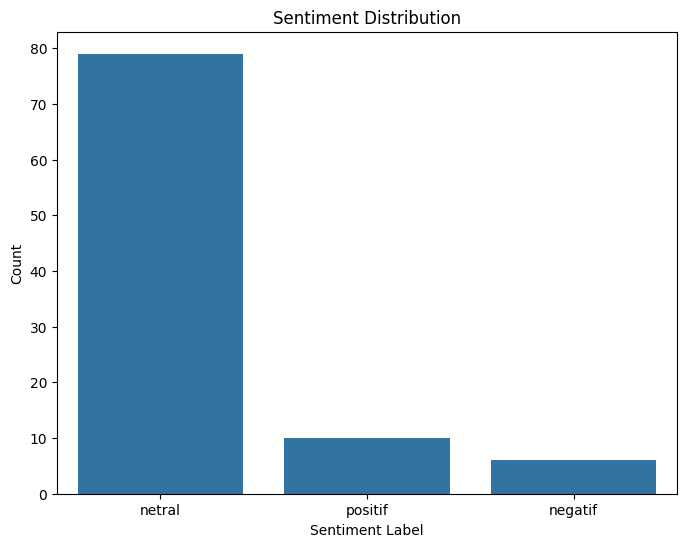

In [28]:
#Membuat grafik plot
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=prabowo)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()


In [29]:
# prompt: Buat word cloud dari setiap kategori

!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

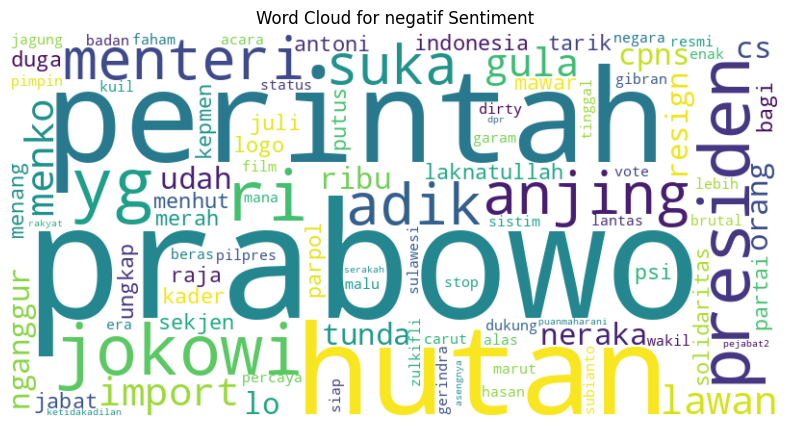

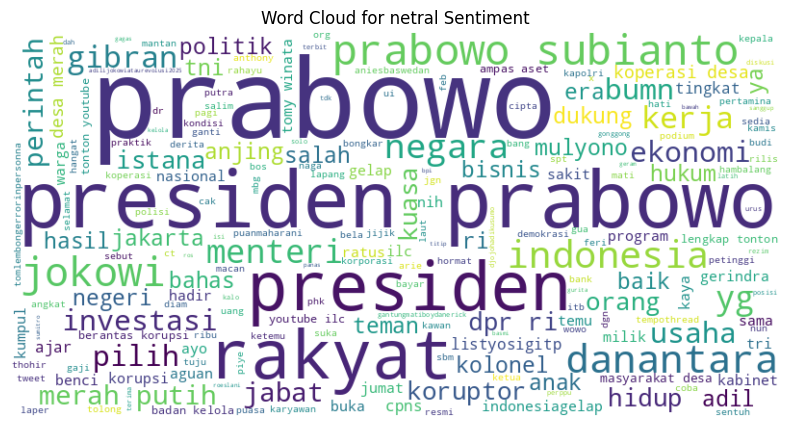

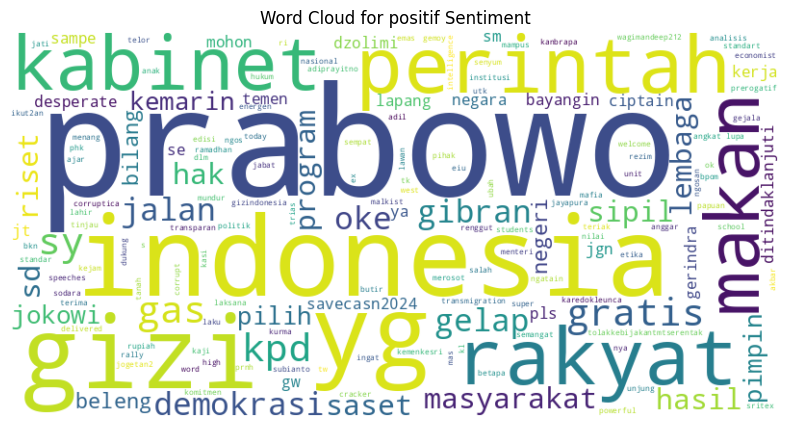

In [30]:

# Group data by sentiment label
sentiment_groups = prabowo.groupby('sentiment_label')

# Create word clouds for each sentiment category
for sentiment, group in sentiment_groups:
    # Combine all stemmed words in the group
    all_words = ' '.join([' '.join(words) for words in group['stemmed_words']])

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

    # Display the generated image:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()


Membuat Model Mechine Learning Untuk Memprediksi Sentimen